# 목표 - 경력에 따른 연봉 예측

## lib로딩 및 데이터 로딩

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('datas_ml/Salary_Data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [60]:
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
df.isna()
df.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

## 데이터 처리

In [6]:
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [11]:
# 종속변수(label)
y = df['Salary']
y.head()

0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
Name: Salary, dtype: float64

In [12]:
#독립변수(feature)
x = df['YearsExperience']
x.head()

0    1.1
1    1.3
2    1.5
3    2.0
4    2.2
Name: YearsExperience, dtype: float64

In [16]:
# 머신러닝은 독립변수가 1개여도, 2Dimension이어야 함.
x_frame = x.to_frame()
x_frame

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


## 피쳐스케일링
- 독립변수가 1개여서 필요가 없음!

## train, test 데이터로 분할

In [17]:
from sklearn.model_selection import train_test_split

In [19]:
train_test_split(x_frame, y, test_size=0.2, random_state=7)

[18     5.9
 24     8.7
 27     9.6
 29    10.5
 12     4.0
 13     4.1
 16     5.1
 0      1.1
 28    10.3
 6      3.0
 26     9.5
 20     6.8
 10     3.9
 21     7.1
 8      3.2
 14     4.5
 7      3.2
 23     8.2
 19     6.0
 3      2.0
 22     7.9
 25     9.0
 4      2.2
 15     4.9
 Name: YearsExperience, dtype: float64,
 2     1.5
 17    5.3
 1     1.3
 9     3.7
 11    4.0
 5     2.9
 Name: YearsExperience, dtype: float64,
 18     81363.0
 24    109431.0
 27    112635.0
 29    121872.0
 12     56957.0
 13     57081.0
 16     66029.0
 0      39343.0
 28    122391.0
 6      60150.0
 26    116969.0
 20     91738.0
 10     63218.0
 21     98273.0
 8      64445.0
 14     61111.0
 7      54445.0
 23    113812.0
 19     93940.0
 3      43525.0
 22    101302.0
 25    105582.0
 4      39891.0
 15     67938.0
 Name: Salary, dtype: float64,
 2     37731.0
 17    83088.0
 1     46205.0
 9     57189.0
 11    55794.0
 5     56642.0
 Name: Salary, dtype: float64]

In [35]:
#리턴을 받는 변수의 순서 중요, x -> y

x_train, x_test, y_train, y_test = train_test_split(x_frame, y, test_size=0.2, random_state=7)

In [59]:
y_test

2     37731.0
17    83088.0
1     46205.0
9     57189.0
11    55794.0
5     56642.0
Name: Salary, dtype: float64

## 모델 학습하기

- 모델 객체 생성하기

In [22]:
# LinearRegression 활용
from sklearn.linear_model import LinearRegression

In [26]:
model_lr = LinearRegression()
model_lr           # 아직 학습 전.

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [25]:
model_lr.coef_

AttributeError: 'LinearRegression' object has no attribute 'coef_'

- 학습하기

In [28]:
model_lr.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [29]:
# w(기울기)
model_lr.coef_

array([9554.2662031])

In [31]:
#b(절편)
model_lr.intercept_

np.float64(24964.822717686446)

## 모델 테스트

In [33]:
y_hat = model_lr.predict(x_test)
y_hat

array([39296.22202233, 75602.43359409, 37385.36878171, 60315.60766914,
       63181.88753007, 52672.19470666])

## 모델 평가

In [41]:
import numpy as np

In [36]:
y_test

2     37731.0
17    83088.0
1     46205.0
9     57189.0
11    55794.0
5     56642.0
Name: Salary, dtype: float64

In [37]:
# 오차 제곱
(y_test - y_hat)**2

2     2.449920e+06
17    5.603370e+07
1     7.778589e+07
9     9.775676e+06
11    5.458088e+07
5     1.575935e+07
Name: Salary, dtype: float64

In [38]:
# 오차 : error의 제곱을 합한 후 데이터의 갯수로 나눔<- 오차제곱을 구한후 평균 구함 (MSE)
((y_test - y_hat)**2).mean()

np.float64(36064238.49395526)

In [42]:
# RMSE (MSE는 너무크기 때문에 RMS구함.)
np.sqrt(((y_test - y_hat)**2).mean())

np.float64(6005.350821888365)

### 식을 이용한 MSE, RMSE 구하기

In [46]:
# MSE
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test, y_hat)
MSE
RMSE = np.sqrt(MSE)
print(MSE, RMSE)

36064238.49395526 6005.350821888365


### R-squared

In [48]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_hat)
print(r2)

0.8143022783109006


### MAE

In [50]:
mae = ((y_test-y_hat).abs()).mean()
print(mae)

5392.453356511897


## 오차의 시각화

In [51]:
df_test = y_test.to_frame()
df_test

,Salary
2,37731.0
17,83088.0
1,46205.0
9,57189.0
11,55794.0
5,56642.0


In [53]:
df_test['y_pred'] = y_hat
df_test

,Salary,y_pred
2,37731.0,39296.222022
17,83088.0,75602.433594
1,46205.0,37385.368782
9,57189.0,60315.607669
11,55794.0,63181.887530
5,56642.0,52672.194707


## 실제값과 예측값의 차이 시각화


In [54]:
# 한글 깨짐 해결
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.rc('font', family='Malgun Gothic')  # Windows 기본 한글 폰트
plt.rc('axes', unicode_minus=False)     # 마이너스 깨짐 방지

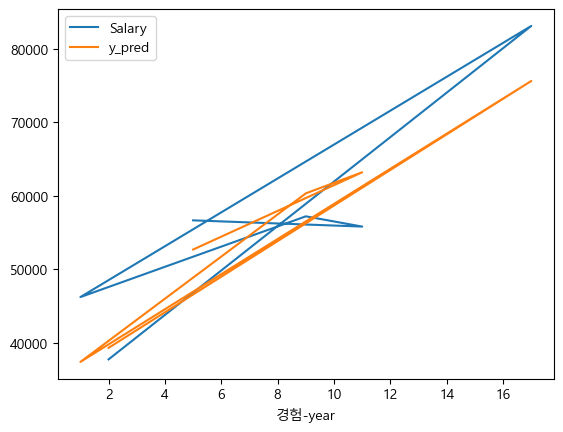

In [55]:
# 근무 년수에 따른 연봉 
df_test.plot(kind='line')
plt.xlabel("경험-year")
plt.show()

In [56]:
# index reset하기
df_test = df_test.reset_index(drop=True)
df_test

,Salary,y_pred
0,37731.0,39296.222022
1,83088.0,75602.433594
2,46205.0,37385.368782
3,57189.0,60315.607669
4,55794.0,63181.887530
5,56642.0,52672.194707


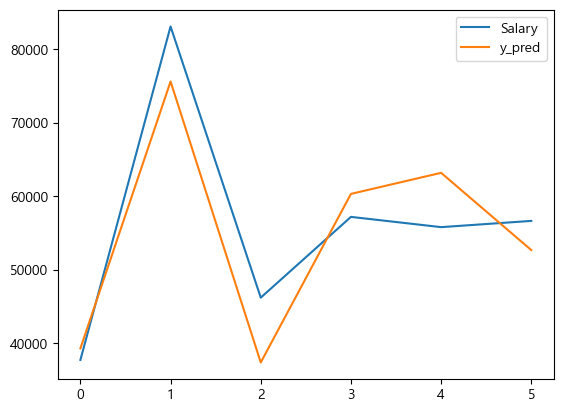

In [57]:
# 근무 년수에 따른 연봉 (꺽은선 그래프)
df_test.plot(kind='line')
plt.show()

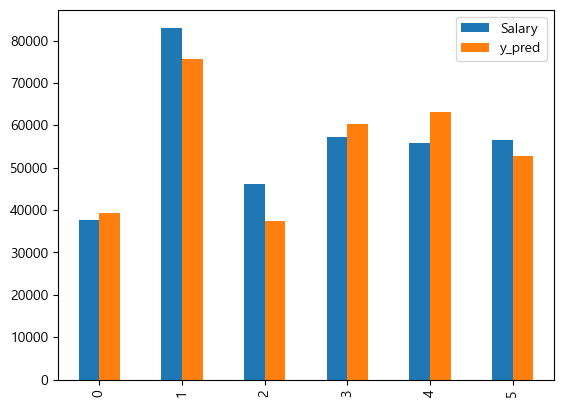

In [58]:
# 근무 년수에 따른 연봉 (막대그래프)
df_test.plot(kind='bar')
plt.show()

## 일반화

In [71]:
my_data = [5, 10]
data_new = np.array([my_data])

In [72]:
model_lr.predict(data_new)

C:\Users\Admin\miniconda3\envs\eda_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: X has 2 features, but LinearRegression is expecting 1 features as input.

### 수집한 데이터셋의 데이터가 아닌 현실 데이터로 일반화

In [74]:
#my_data를 2차원으로 변경.
data_np = np.array(my_data)

In [76]:
data_np = data_np.reshape(-1,1)

In [77]:
model_lr.predict(data_np)

C:\Users\Admin\miniconda3\envs\eda_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([ 72736.15373316, 120507.48474864])